Explicação do Código:

1 - Importando Bibliotecas: Usamos o Pandas para carregar e manipular os dados.
2 - Carregando os Dados: O arquivo CSV gerado na etapa anterior é carregado no df (DataFrame do Pandas).
3 - Exibindo as Primeiras Linhas: O método df.head() exibe as primeiras 5 linhas do DataFrame para termos uma ideia do formato dos dados.
4 - Analisando Estatísticas Descritivas: Usamos df.describe() para obter algumas estatísticas como a média, desvio padrão, valores mínimos e máximos para todas as colunas numéricas.
5 - Calculando Médias: Calculamos a média de Tempo de Produção, Tempo de Setup e Quantidade Produzida usando o método .mean() do Pandas.
6 - Correlação: Calculamos a correlação entre o Tempo de Produção e o Tempo de Setup com o método .corr() para ver se existe uma relação entre essas duas variáveis.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd

# Carregando os dados do arquivo CSV
df = pd.read_csv('../data/dados_producao.csv')

# Exibindo as primeiras linhas para entender como os dados estão organizados
df.head()

# Analisando as estatísticas descritivas dos dados
df.describe()

# Analisando o tempo médio de produção
media_tempo_producao = df['Tempo_Producao'].mean()
print(f"Tempo médio de produção: {media_tempo_producao:.2f} minutos")

# Analisando o tempo médio de setup
media_tempo_setup = df['Tempo_Setup'].mean()
print(f"Tempo médio de setup: {media_tempo_setup:.2f} minutos")

# Analisando a quantidade média produzida
media_quantidade_produzida = df['Quantidade_Produzida'].mean()
print(f"Quantidade média produzida: {media_quantidade_produzida:.2f} unidades")

# Comparando o tempo de produção com o tempo de setup (por exemplo, correlação)
correlacao = df[['Tempo_Producao', 'Tempo_Setup']].corr()
print("Correlação entre tempo de produção e tempo de setup:")
print(correlacao)


Tempo médio de produção: 135.19 minutos
Tempo médio de setup: 35.10 minutos
Quantidade média produzida: 55.30 unidades
Correlação entre tempo de produção e tempo de setup:
                Tempo_Producao  Tempo_Setup
Tempo_Producao        1.000000    -0.013547
Tempo_Setup          -0.013547     1.000000


Interpretação dos Resultados:

Tempo médio de produção:
O tempo médio de produção foi de 135,19 minutos. Isso significa que, em média, cada unidade leva cerca de 2 horas e 15 minutos para ser produzida. Esse valor pode variar dependendo do tipo de produto e da linha de produção, mas é um bom indicador inicial do tempo necessário para produção.

Tempo médio de setup:
O tempo médio de setup foi de 35,10 minutos. Esse valor representa o tempo necessário para ajustar a máquina e a linha de produção antes de iniciar a produção de uma nova unidade ou lote de produtos. Isso pode incluir ajustes na máquina, troca de ferramentas, calibração, etc. É interessante observar que esse valor é significativamente menor que o tempo de produção, o que é comum em muitas indústrias.

Quantidade média produzida:
A quantidade média produzida foi de 55,30 unidades. Isso indica a média de unidades fabricadas por ciclo de produção. Esse valor pode variar dependendo do tipo de produto e da demanda da fábrica.

Correlação entre tempo de produção e tempo de setup:
A correlação entre o tempo de produção e o tempo de setup é de -0.013547, o que indica uma correlação muito fraca e negativa. Em termos simples, isso significa que não há uma relação direta entre o tempo de produção e o tempo de setup — ou seja, mudanças no tempo de setup não afetam significativamente o tempo de produção. Isso é interessante, pois poderia sugerir que o tempo de setup é relativamente independente do tempo de produção em seu cenário de dados sintéticos.

Próximos Passos para Maximizar os Insights:

1. Análise Estatística Detalhada: Vamos começar com uma análise estatística mais profunda dos dados

incluindo:

Desvio Padrão: Para ver a dispersão dos tempos de produção e setup.
Mínimo, Máximo e Quartis: Para entender melhor a distribuição dos dados (ex: quem são os valores mais altos ou mais baixos e onde estão os pontos médios).
Skewness (assimetria) e Kurtosis (curtose): Para ver como os dados se distribuem. Se a distribuição é assimétrica ou tem picos mais altos.

Explicação:

df.describe(): O Pandas tem um método chamado describe() que gera uma série de estatísticas básicas para as colunas numéricas do DataFrame, como a média, desvio padrão, mínimo, máximo, quartis (25%, 50%, 75%).
Skewness (assimetria): Mede a simetria da distribuição dos dados. Se o valor for positivo, a cauda da distribuição está para a direita; se for negativo, está para a esquerda.
Kurtosis (curtose): Mede o "peso das caudas" da distribuição. Uma kurtosis maior que 3 indica caudas mais pesadas (picos mais altos e mais extremos).

In [2]:
# Estatísticas detalhadas (Desvio Padrão, Mínimo, Máximo, Quartis)
print(df.describe())

# Skewness (assimetria) e Kurtosis (curtose)
skew_producao = df['Tempo_Producao'].skew()
kurt_producao = df['Tempo_Producao'].kurtosis()
skew_setup = df['Tempo_Setup'].skew()
kurt_setup = df['Tempo_Setup'].kurtosis()

print(f"Skewness do Tempo de Produção: {skew_producao:.2f}")
print(f"Kurtosis do Tempo de Produção: {kurt_producao:.2f}")
print(f"Skewness do Tempo de Setup: {skew_setup:.2f}")
print(f"Kurtosis do Tempo de Setup: {kurt_setup:.2f}")


       Tempo_Producao   Tempo_Setup  Quantidade_Produzida
count    10000.000000  10000.000000          10000.000000
mean       135.185600     35.096400             55.295700
std         60.873309     14.761677             26.328972
min         30.000000     10.000000             10.000000
25%         83.000000     22.000000             32.000000
50%        136.000000     35.000000             55.000000
75%        187.000000     48.000000             79.000000
max        240.000000     60.000000            100.000000
Skewness do Tempo de Produção: -0.01
Kurtosis do Tempo de Produção: -1.19
Skewness do Tempo de Setup: -0.01
Kurtosis do Tempo de Setup: -1.21


Estatísticas Descritivas (df.describe()) Essas métricas são os primeiros insights que podemos tirar sobre os dados, que ajudam a entender sua distribuição geral. 

Aqui estão os detalhes do que cada métrica significa:

Tempo de Produção:

Média: 135.19 minutos - Isso significa que, em média, cada ciclo de produção leva 135.19 minutos.
Desvio Padrão: 60.87 minutos - Este valor indica a dispersão dos tempos de produção. Quanto maior o desvio padrão, mais variados são os tempos de produção.
Mínimo: 30 minutos - O menor tempo de produção registrado foi de 30 minutos.
Máximo: 240 minutos - O maior tempo de produção foi de 240 minutos.
Quartis (25%, 50%, 75%): Esses valores dividem os dados em quatro partes:
25% dos dados têm um tempo de produção menor que 83 minutos.
50% (mediana) dos dados têm um tempo de produção menor que 136 minutos.
75% dos dados têm um tempo de produção menor que 187 minutos.

Tempo de Setup:

Média: 35.10 minutos - Em média, o tempo de setup é de 35.10 minutos.
Desvio Padrão: 14.76 minutos - O desvio padrão indica que, embora o tempo de setup seja relativamente mais consistente, ainda há alguma variação.
Mínimo: 10 minutos - O menor tempo de setup foi de 10 minutos.
Máximo: 60 minutos - O maior tempo de setup foi de 60 minutos.
Quartis (25%, 50%, 75%): Isso mostra a variação do tempo de setup:
25% dos dados têm um tempo de setup menor que 22 minutos.
50% dos dados têm um tempo de setup menor que 35 minutos.
75% dos dados têm um tempo de setup menor que 48 minutos.

Quantidade Produzida:

A quantidade produzida varia de 10 a 100 unidades, com uma média de 55.30 unidades.

Skewness e Kurtosis

Skewness (Assimetria): O valor de skewness para o Tempo de Produção e Tempo de Setup é -0.01, o que indica que os dados são simétricos, sem grandes desvios para a esquerda ou direita. Uma skewness de 0 indica uma distribuição perfeitamente simétrica, então esse valor muito próximo de 0 é um bom sinal de equilíbrio.

Kurtosis (Curtose): O valor de kurtosis para o Tempo de Produção e Tempo de Setup é -1.19 e -1.21, respectivamente. Esses valores indicam que os dados têm caudas mais leves do que uma distribuição normal. Ou seja, não há picos muito grandes ou extremos nos dados.

2. Visualização dos Dados

A visualização ajudará a entender melhor a distribuição dos dados e pode trazer insights importantes. 

Vamos usar:

Histograma: Para visualizar a distribuição do tempo de produção e setup.
Gráfico de dispersão (scatter plot): Para explorar a relação entre o tempo de produção e o tempo de setup.
Boxplot: Para identificar outliers e ver a distribuição dos dados de maneira compacta.

Explicação:

plt.figure(figsize=(12, 6)): Define o tamanho da figura do gráfico. No caso, estamos criando uma figura de 12x6 polegadas.
sns.histplot(): Cria um histograma. O kde=True adiciona uma estimativa da função de densidade (curva suave) à distribuição do histograma.
bins=20: Define o número de "barras" no histograma. Aqui, 20 barras são usadas para dividir os dados.
plt.tight_layout(): Ajusta o layout para garantir que os gráficos não se sobreponham.

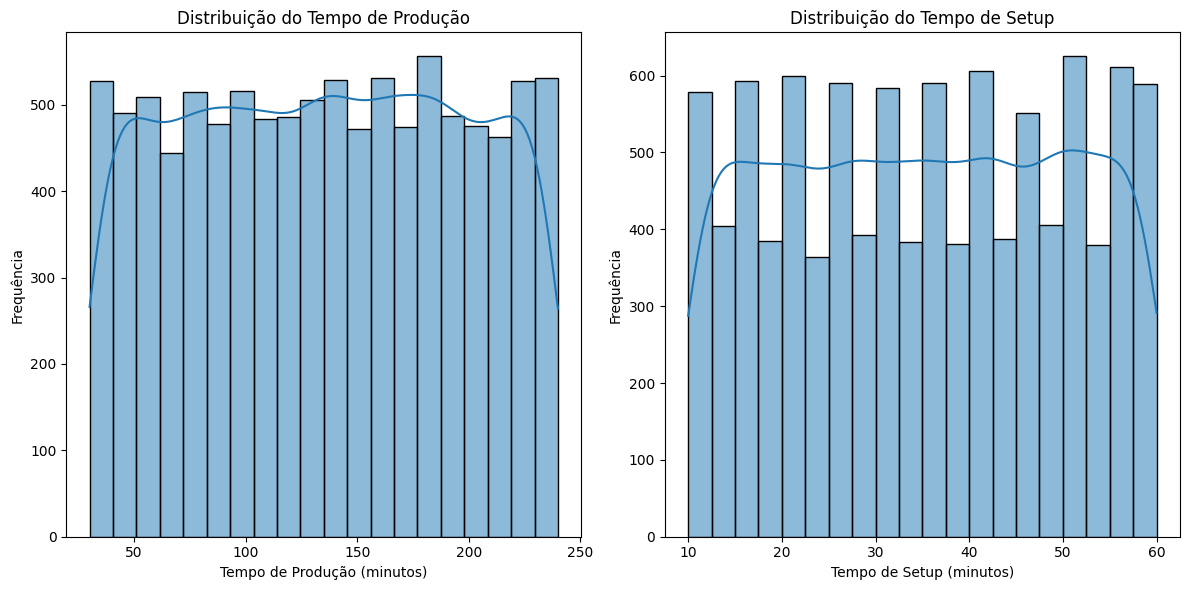

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para visualizar a distribuição
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Tempo_Producao'], kde=True, bins=20)
plt.title('Distribuição do Tempo de Produção')
plt.xlabel('Tempo de Produção (minutos)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df['Tempo_Setup'], kde=True, bins=20)
plt.title('Distribuição do Tempo de Setup')
plt.xlabel('Tempo de Setup (minutos)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


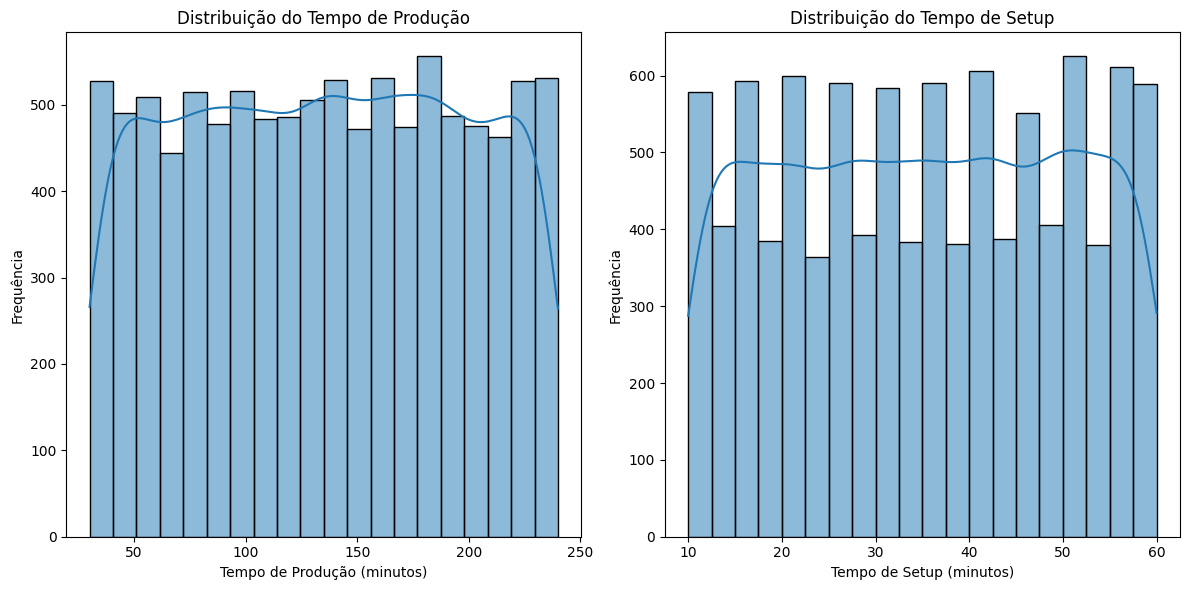

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para visualizar a distribuição
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Tempo_Producao'], kde=True, bins=20)
plt.title('Distribuição do Tempo de Produção')
plt.xlabel('Tempo de Produção (minutos)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.histplot(df['Tempo_Setup'], kde=True, bins=20)
plt.title('Distribuição do Tempo de Setup')
plt.xlabel('Tempo de Setup (minutos)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()
